# Initial installs

In [1]:
#pip install 'fsspec>=0.3.3'

In [2]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

In [3]:
#!pip install requests
#!pip install aiohttp

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/MyDrive/Colab Notebooks/DS 655'

/content/drive/MyDrive/Colab Notebooks/DS 655


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


# Importing subway data

In [7]:
subway_df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')
subway_df.head()

<ipython-input-7-2fd8b77ddafd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,02/01/2022 12:00:00 AM,H007,1 Av (L),M,L,metrocard,124,2,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T00:00:00H0071 Av (L)MLmetrocard
1,02/01/2022 01:00:00 AM,H007,1 Av (L),M,L,metrocard,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T01:00:00H0071 Av (L)MLmetrocard
2,02/01/2022 02:00:00 AM,H007,1 Av (L),M,L,metrocard,38,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T02:00:00H0071 Av (L)MLmetrocard
3,02/01/2022 03:00:00 AM,H007,1 Av (L),M,L,metrocard,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T03:00:00H0071 Av (L)MLmetrocard
4,02/01/2022 04:00:00 AM,H007,1 Av (L),M,L,metrocard,26,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T04:00:00H0071 Av (L)MLmetrocard


In [12]:
num_rows = subway_df.shape[0]
print(num_rows)



11802622


In [13]:
num_columns = subway_df.shape[1]
print(num_columns)

11802622


In [15]:
shape = subway_df.shape
print(shape)

(11802622, 12)


In [18]:
#Data Types
data_types = subway_df.dtypes
print("Data Types:")
print(data_types)


Data Types:
transit_timestamp      object
station_complex_id     object
station_complex        object
borough                object
routes                 object
payment_method         object
ridership               int64
transfers               int64
latitude              float64
longitude             float64
Georeference           object
itsuid                 object
dtype: object


In [19]:
# Unique Values
unique_values = subway_df.nunique()
print("\nUnique Values:")
print(unique_values)



Unique Values:
transit_timestamp        14614
station_complex_id         425
station_complex            425
borough                      5
routes                      95
payment_method               2
ridership                15002
transfers                 2574
latitude                   425
longitude                  425
Georeference               426
itsuid                11802622
dtype: int64


In [51]:
# Value Counts (for a specific column)
value_counts = subway_df['station_complex'].value_counts()
print("\nValue Counts for 'station_complex' column:")
print(value_counts)



Value Counts for 'station_complex' column:
14 St (A,C,E)/8 Av (L)                                                           28990
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    28986
Grand Central-42 St (S,4,5,6,7)                                                  28985
14 St-Union Sq (L,N,Q,R,W,4,5,6)                                                 28984
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                                                28984
                                                                                 ...  
Tompkinsville                                                                    22213
Bay Pkwy (F)                                                                     21932
Neptune Av (F)                                                                   21461
Broad Channel (A,S)                                                              20540
Beach 105 St (A,S)                                                               19431

In [25]:
# Summary Statistics
summary_stats = subway_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
          ridership     transfers      latitude     longitude
count  1.180262e+07  1.180262e+07  1.180262e+07  1.180262e+07
mean   3.038711e+02  1.284253e+01  4.073068e+01 -7.393360e+01
std    9.563938e+02  7.231063e+01  7.944233e-02  5.693595e-02
min    1.000000e+00  0.000000e+00  4.057613e+01 -7.407484e+01
25%    2.100000e+01  0.000000e+00  4.067538e+01 -7.398035e+01
50%    8.000000e+01  1.000000e+00  4.072028e+01 -7.394425e+01
75%    2.490000e+02  7.000000e+00  4.079164e+01 -7.389775e+01
max    8.369400e+04  8.598000e+03  4.090313e+01 -7.375540e+01


# Cleaning subway data

In [26]:
subway_df.isnull().sum()

transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
routes                2
payment_method        0
ridership             0
transfers             0
latitude              0
longitude             0
Georeference          0
itsuid                0
dtype: int64

In [27]:
subway_df = subway_df.dropna()

In [28]:
# Assuming 'L'transit_timestamp'' is a timestamp column
subway_df['transit_timestamp'] = pd.to_datetime(subway_df['transit_timestamp'])


<ipython-input-28-bd926383621c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_df['transit_timestamp'] = pd.to_datetime(subway_df['transit_timestamp'])


In [29]:
# Extract hour and day of the week from the timestamp
subway_df['hour'] = subway_df['transit_timestamp'].dt.hour
subway_df['day_of_week'] = subway_df['transit_timestamp'].dt.dayofweek


<ipython-input-29-2d978ca0c165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_df['hour'] = subway_df['transit_timestamp'].dt.hour
<ipython-input-29-2d978ca0c165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_df['day_of_week'] = subway_df['transit_timestamp'].dt.dayofweek


# Logistic Regression

In [30]:
# Select relevant features for linear regression
features = [ 'borough', 'routes', 'payment_method', 'transfers', 'latitude', 'longitude']
X = subway_df[features]
y = subway_df['ridership']




In [31]:
X = pd.get_dummies(X, columns=['borough', 'routes', 'payment_method'], drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [36]:
#create the pred variables
linear_y_train_pred = model.predict(X_train)
linear_y_test_pred = model.predict(X_test)

In [53]:
#Print training RMSE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE train: {:.3f}, test: {:.3f}'.format(mean_squared_error(y_train, linear_y_train_pred,squared=False),
                                       mean_squared_error(y_test, linear_y_test_pred,squared=False)))
print('RMSE train: {:.3f}, test: {:.3f}'.format(mean_absolute_error(y_train, linear_y_train_pred),
                                       mean_absolute_error(y_test, linear_y_test_pred)))
#print the training R2 score
print("Linear Model training R^2 score: {:.3f}".format(model.score(X_train, y_train)))

#print the testing R2 score
print("Linear Model testing R^2 score: {:.3f}".format(model.score(X_test, y_test)))

MSE train: 781.587, test: 777.423
RMSE train: 252.601, test: 252.185
Linear Model training R^2 score: 0.333
Linear Model testing R^2 score: 0.335


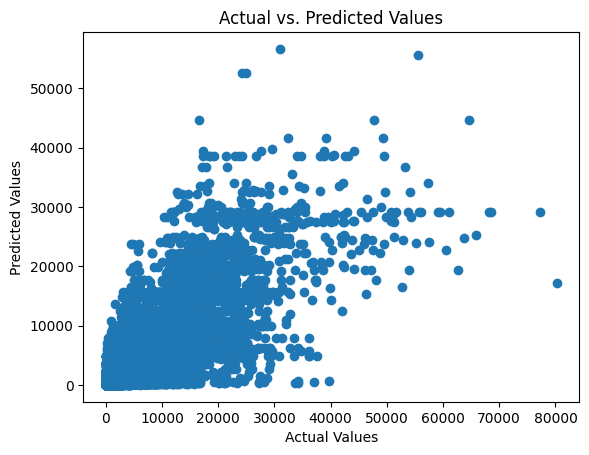

In [55]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [54]:
#from sklearn.model_selection import learning_curve
#train_sizes, train_scores, test_scores = learning_curve(
   # model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean squared errors and take the negative to convert to positive
#train_mse = -np.mean(train_scores, axis=1)
#test_mse = -np.mean(test_scores, axis=1)


In [40]:
#plt.figure(figsize=(10, 6))
#plt.plot(train_sizes, train_mse, label='Training MSE')
#plt.plot(train_sizes, test_mse, label='Validation MSE')
#plt.xlabel('Training Set Size')
#plt.ylabel('Mean Squared Error (MSE)')
#plt.title('Learning Curves for Linear Regression')
#plt.legend()
#plt.grid(True)
#plt.show()


# Decision trees

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model with pruning (limit the depth)
# You can adjust the max_depth parameter to control the amount of pruning
max_depth = 5  # Adjust this value as needed
tree_model = DecisionTreeRegressor(max_depth=max_depth)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)
y_train_pred = tree_model.predict(X_train)


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse1 = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) testing: {mse}')
print(f'Mean Squared Error (MSE) training: {mse1}')
print(f'R-squared (R2) testing: {r2}')
print(f'R-squared (R2) training: {r2t}')

Mean Squared Error (MSE) testing: 425697.49269635003
Mean Squared Error (MSE) training: 433875.63065112435
R-squared (R2) testing: 0.5317188599590656
R-squared (R2) training: 0.5263860624477059


In [64]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model with pruning (limit the depth)
# You can adjust the max_depth parameter to control the amount of pruning
max_depth = 10  # Adjust this value as needed
tree_model = DecisionTreeRegressor(max_depth=max_depth)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse1 = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) testing: {mse}')
print(f'Mean Squared Error (MSE) training: {mse1}')
print(f'R-squared (R2) testing: {r2}')
print(f'R-squared (R2) training: {r2t}')


Mean Squared Error (MSE) testing: 288693.49443903076
Mean Squared Error (MSE) training: 433875.63065112435
R-squared (R2) testing: 0.682427730917501
R-squared (R2) training: 0.5263860624477059


# Visualizing the data

<Axes: title={'center': 'ridership'}, xlabel='hour'>

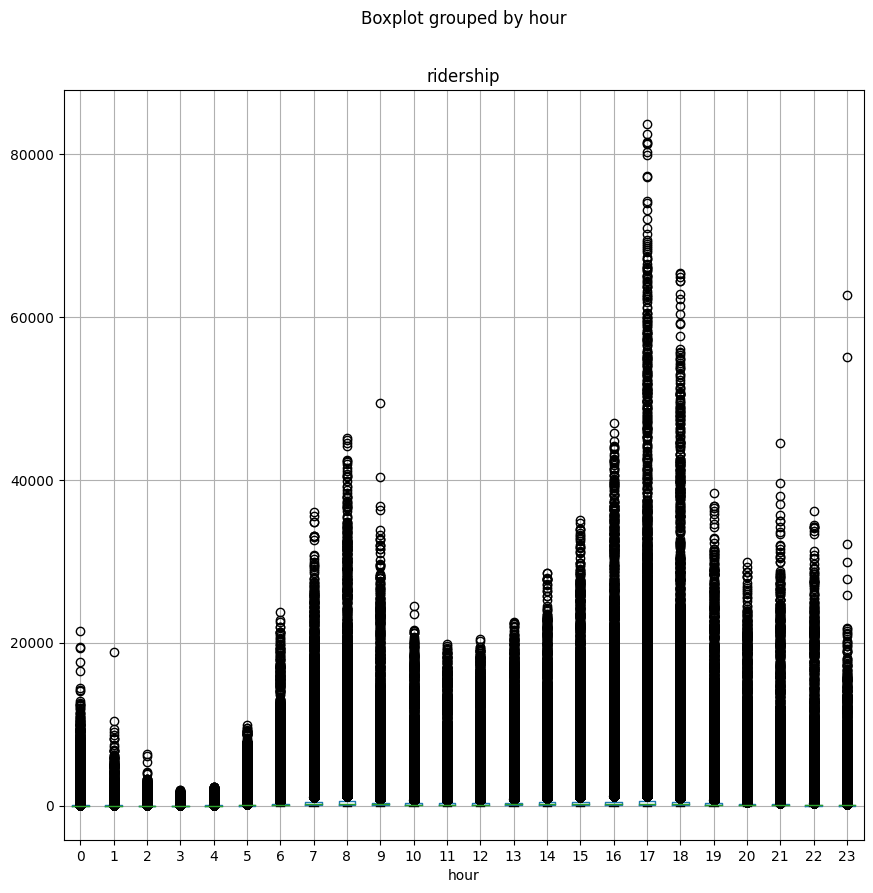

In [45]:
subway_df.boxplot(column='ridership', by = 'hour', figsize = (10,10))

In [46]:
ridership_by_day = subway_df.groupby('day_of_week')['ridership'].mean()

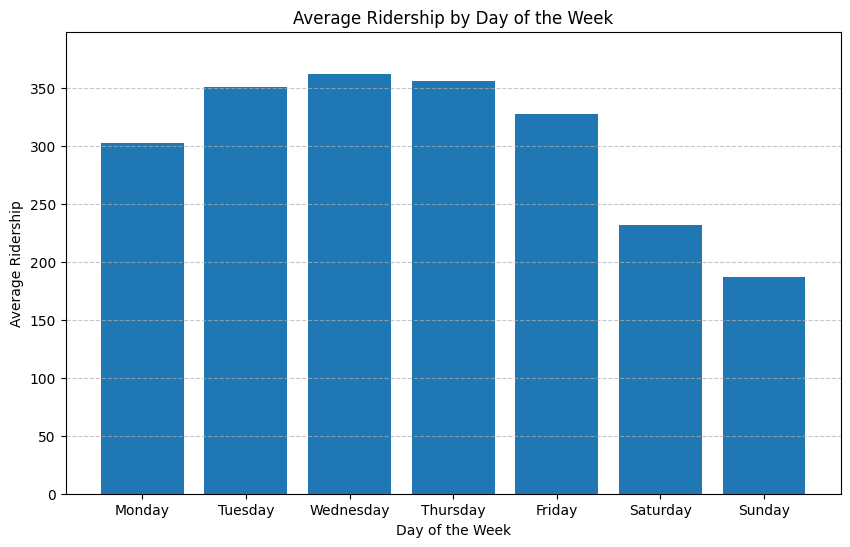

In [47]:
# Define the days of the week labels for the x-axis
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, ridership_by_day)
plt.title('Average Ridership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ridership')
plt.ylim(0, max(ridership_by_day) * 1.1)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability

# Show the plot
plt.show()







<Axes: title={'center': 'ridership'}, xlabel='day_of_week'>

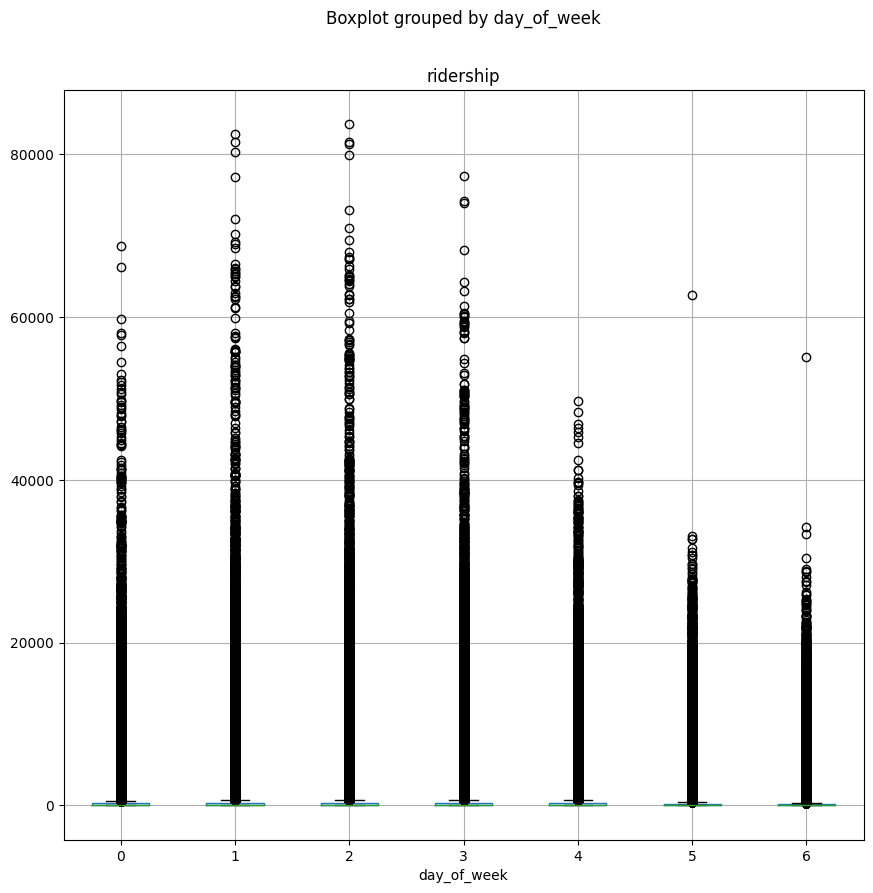

In [48]:
subway_df.boxplot(column='ridership', by = 'day_of_week', figsize = (10,10))

<Axes: title={'center': 'ridership'}, xlabel='borough'>

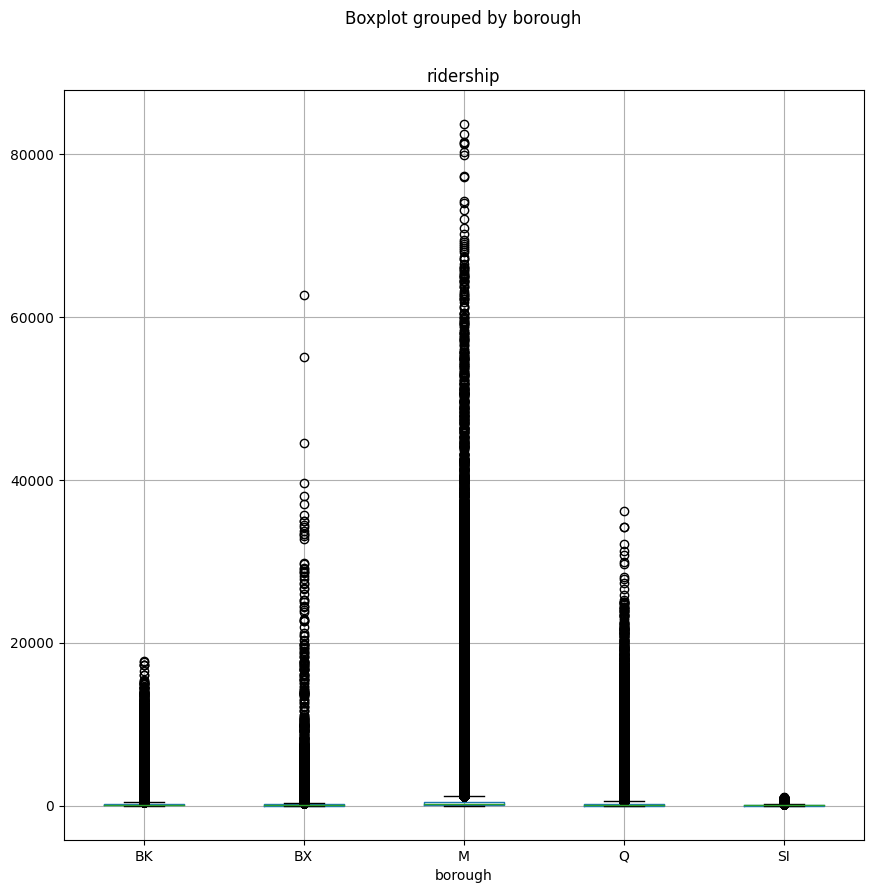

In [49]:
subway_df.boxplot(column='ridership', by = 'borough', figsize = (10,10))

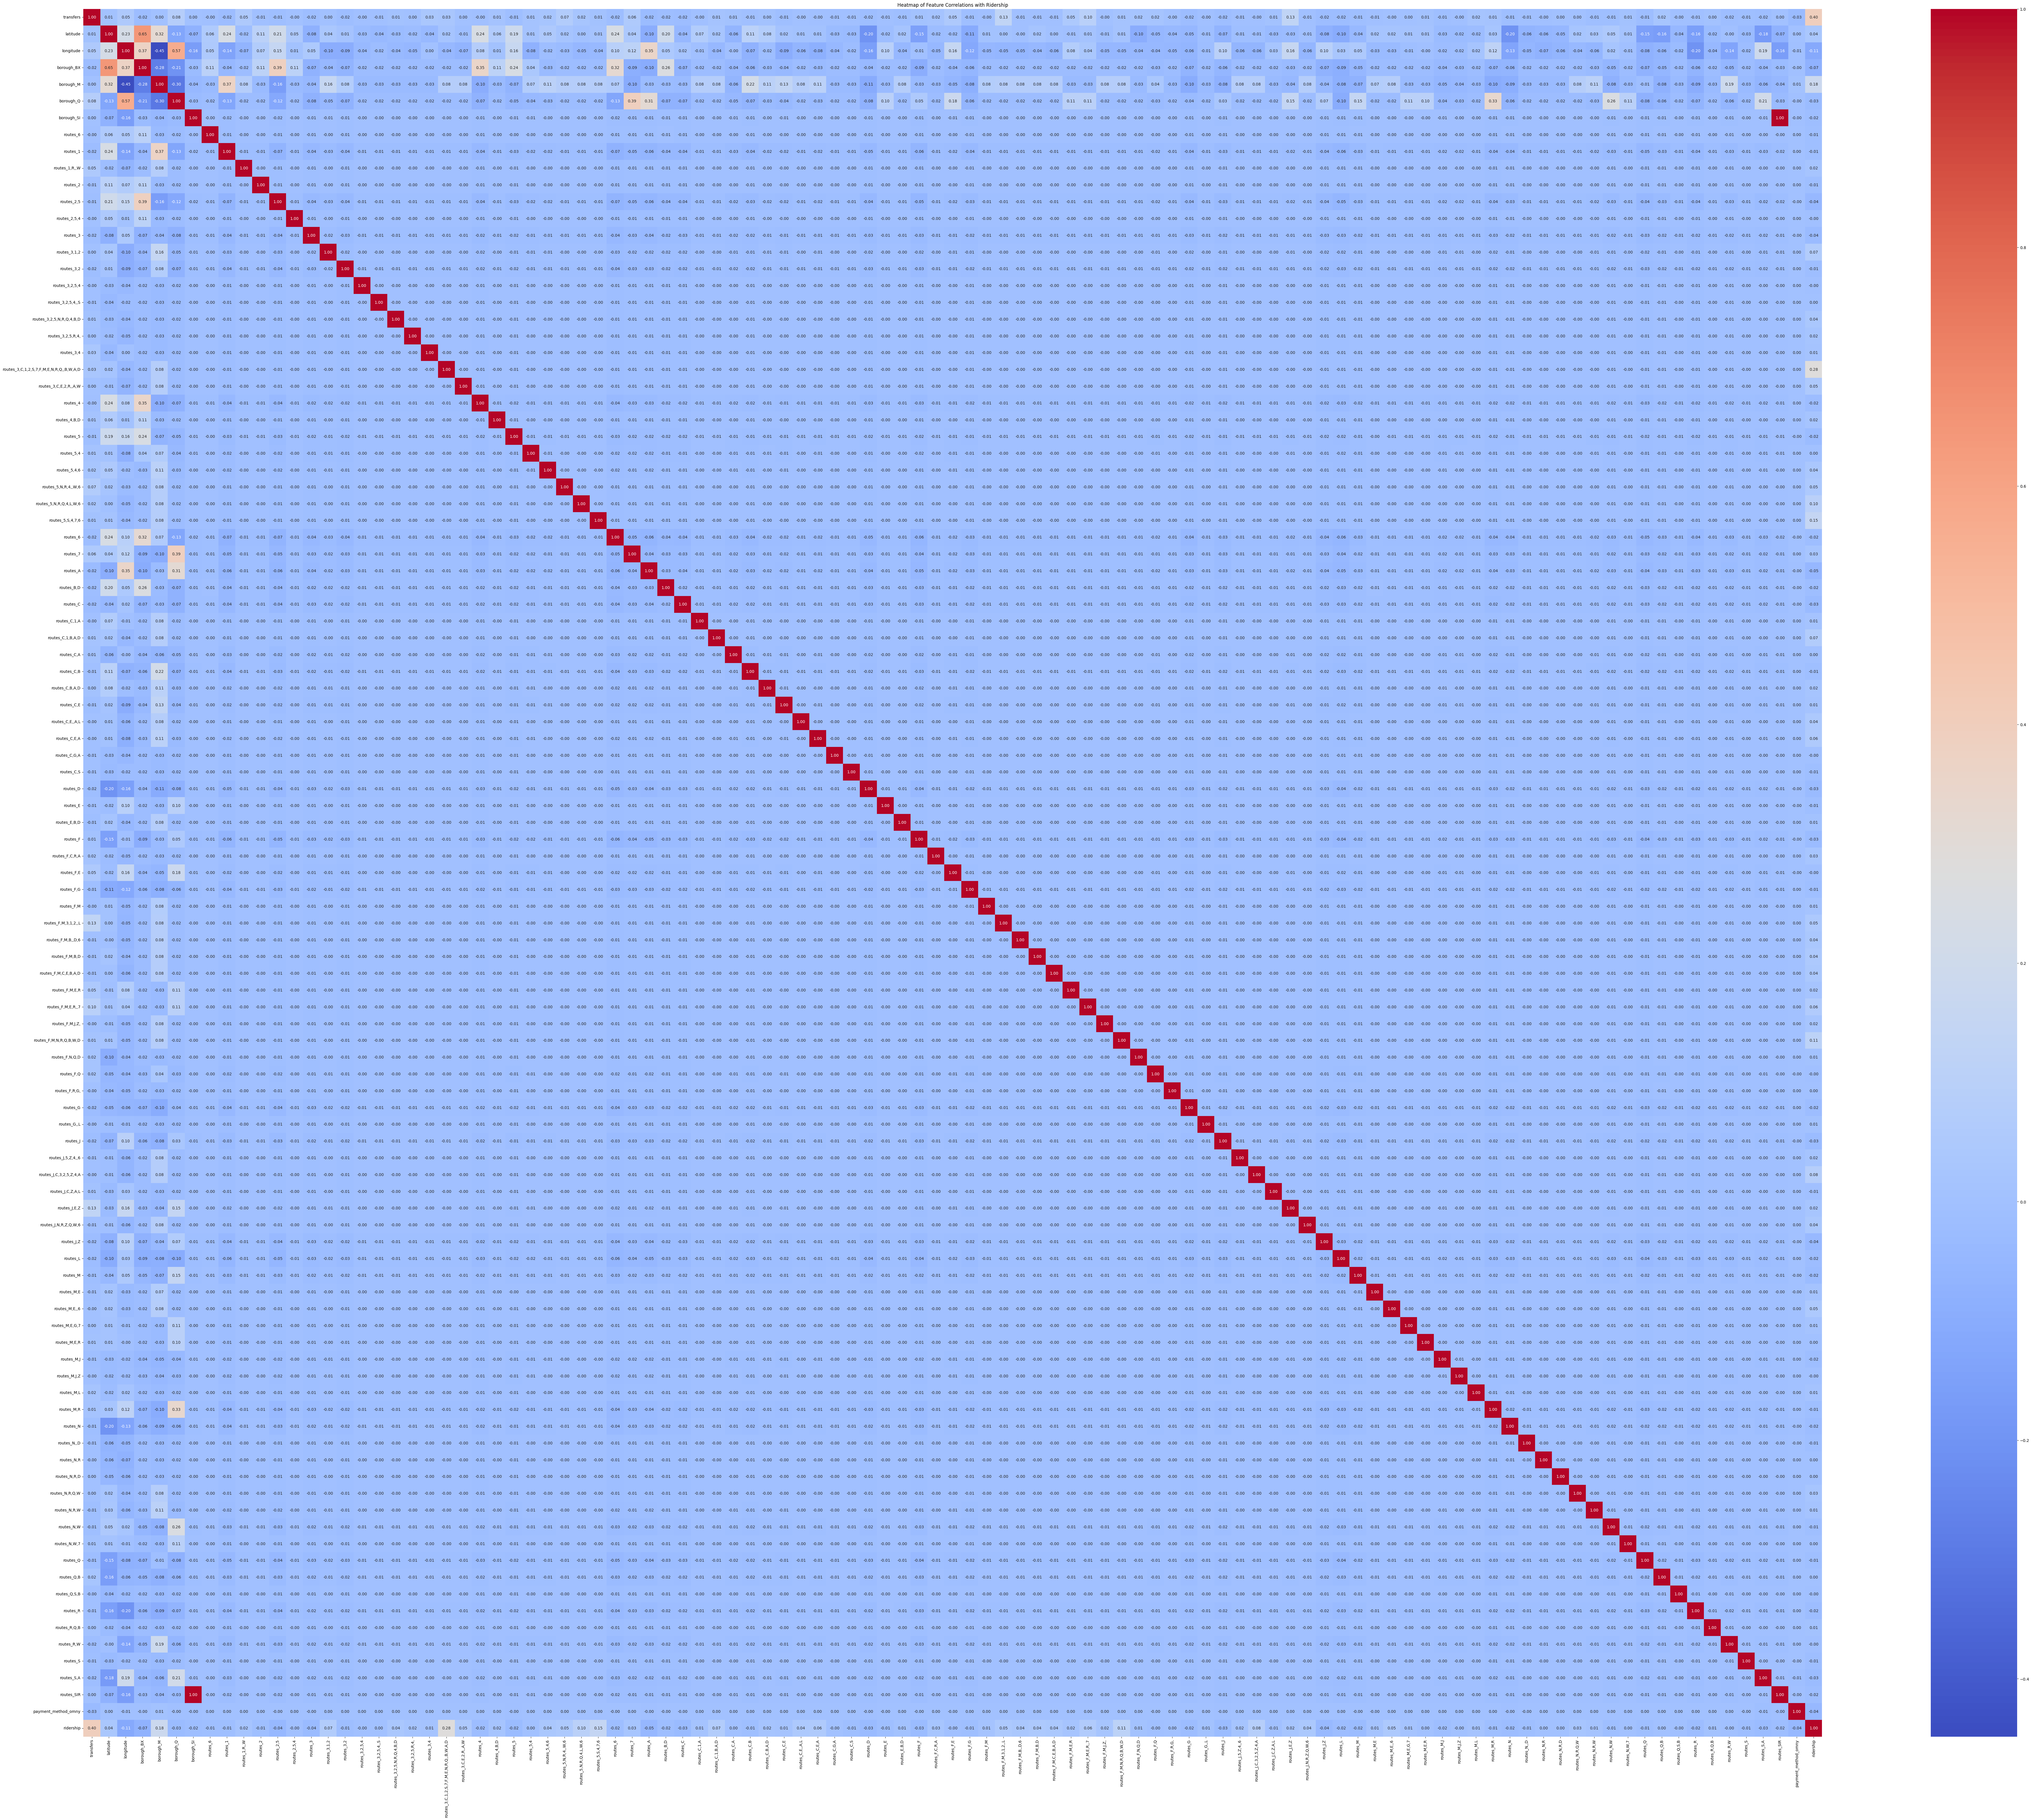

In [50]:
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations with Ridership")
plt.show()
